# Example Analysis using the Taylor Series of sin(x)

In [22]:
#Import needed functions
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time

Define Taylor Series sine function

In [23]:
#will need a factorial function for definition
def factorial_recursive(n):
    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative integer.")
    if n == 0:
        return 1
    else:
        return n * factorial_recursive(n - 1)


# Taylor series representation with truncation to n_terms
def sin_taylor(x, n_terms=5):
    result = 0
    for n in range(n_terms):
        term = ((-1)**n * x**(2*n + 1)) / factorial_recursive(2*n + 1)
        result += term
    return result

## Timing

For a simple evaluation, let's generate array of x-values

In [24]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

Evaluate our function for the defined x's above

In [25]:
y_taylor = np.array([sin_taylor(val) for val in x])

Note an easy way of checking evaluation time is done using the `%%time` method

In [26]:
%%time
y_taylor = np.array([sin_taylor(val) for val in x])

CPU times: user 5.64 ms, sys: 58 μs, total: 5.69 ms
Wall time: 5.58 ms


Or we can be more explicit with how this is done, which is better for storing times as you go

In [27]:
# Timing
x_test = np.linspace(-2*np.pi, 2*np.pi, int(1e3))

start = time.time()
_ = [sin_taylor(xi) for xi in x_test]
end = time.time()

elapsed = end - start
print(elapsed)

0.014189720153808594


## Accuracy

How accurate is our function? Let's take a moment to look at a plot:

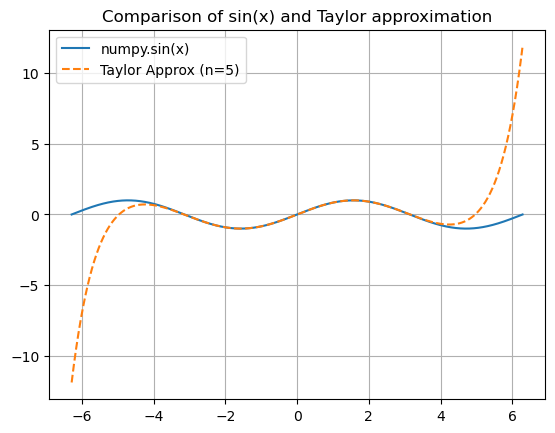

In [14]:
plt.plot(x, true_sin, label="numpy.sin(x)")
plt.plot(x, y_taylor, '--', label="Taylor Approx (n=5)")
plt.title("Comparison of sin(x) and Taylor approximation")
plt.legend()
plt.grid(True)
plt.show()

Notice this tells us we might be better considering a range of $-\pi$ to $+\pi$ and that's ok!

In terms of accuracy, I want to study how this relationship goes in terms of how many series terms I keep. Let's look at doing 1-10 terms

In [18]:
taylor_terms = np.linspace(1,10,10,dtype=np.int32)

print(taylor_terms)

[ 1  2  3  4  5  6  7  8  9 10]


Evaluate each version of the Taylor Expansion defined above

In [19]:
#create values to use for comparison purposes
x_vals = np.linspace(-2*np.pi, 2*np.pi, int(5e4)) #need very fine grid of x values here for accuracy in the 'true' values
true_vals = np.sin(x_vals)

#create empty object to hold results
results = {}

# Evaluate each version of Taylor approximation
for terms in taylor_terms:
    start_time = time.time()
    approx_vals = np.array([sin_taylor(x, terms) for x in x_vals])
    elapsed_time = time.time() - start_time

    abs_error = np.abs(true_vals - approx_vals)
    l2_error = np.sqrt(np.mean(abs_error**2))
    
    results[terms] = {
        "time": elapsed_time,
        "l2_error": l2_error
    }

In [20]:
# Extract data for plotting
labels = [f"{n} terms" for n in results.keys()]
times = [results[n]["time"] for n in results]
errors = [results[n]["l2_error"] for n in results]

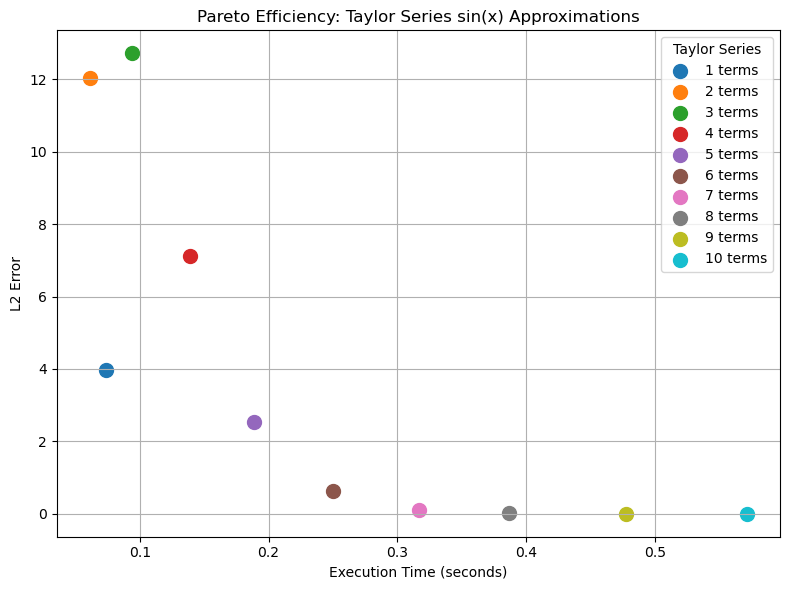

In [21]:
# Plot Pareto Efficiency
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(times[i], errors[i], label=label, s=100)

plt.xlabel("Execution Time (seconds)")
plt.ylabel("L2 Error")
plt.title("Pareto Efficiency: Taylor Series sin(x) Approximations")
plt.legend(title="Taylor Series")
plt.grid(True)
plt.tight_layout()
plt.show()